In [14]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:

labels = []
values = []


In [16]:
with open('Iris.csv', newline='') as csvf:
    reader = csv.reader(csvf, delimiter=',')
    
    labels.append(next(reader))  # Reads the header row
    c=0
    for row in reader:
        values.append(row)  
        


In [17]:
n=len(values)

test_size=int(.2*n)
train_size=n-test_size

train_data=values[:train_size]
test_data=values[train_size:]


In [18]:
train_data

[['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['6', '5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['7', '4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['8', '5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['9', '4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['10', '4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['11', '5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['12', '4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['13', '4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['14', '4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['15', '5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['16', '5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['17', '5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['18', '5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['19', '5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['20', '5.1', '3.8',

In [19]:
test_data

[['121', '6.9', '3.2', '5.7', '2.3', 'Iris-virginica'],
 ['122', '5.6', '2.8', '4.9', '2.0', 'Iris-virginica'],
 ['123', '7.7', '2.8', '6.7', '2.0', 'Iris-virginica'],
 ['124', '6.3', '2.7', '4.9', '1.8', 'Iris-virginica'],
 ['125', '6.7', '3.3', '5.7', '2.1', 'Iris-virginica'],
 ['126', '7.2', '3.2', '6.0', '1.8', 'Iris-virginica'],
 ['127', '6.2', '2.8', '4.8', '1.8', 'Iris-virginica'],
 ['128', '6.1', '3.0', '4.9', '1.8', 'Iris-virginica'],
 ['129', '6.4', '2.8', '5.6', '2.1', 'Iris-virginica'],
 ['130', '7.2', '3.0', '5.8', '1.6', 'Iris-virginica'],
 ['131', '7.4', '2.8', '6.1', '1.9', 'Iris-virginica'],
 ['132', '7.9', '3.8', '6.4', '2.0', 'Iris-virginica'],
 ['133', '6.4', '2.8', '5.6', '2.2', 'Iris-virginica'],
 ['134', '6.3', '2.8', '5.1', '1.5', 'Iris-virginica'],
 ['135', '6.1', '2.6', '5.6', '1.4', 'Iris-virginica'],
 ['136', '7.7', '3.0', '6.1', '2.3', 'Iris-virginica'],
 ['137', '6.3', '3.4', '5.6', '2.4', 'Iris-virginica'],
 ['138', '6.4', '3.1', '5.5', '1.8', 'Iris-virgi

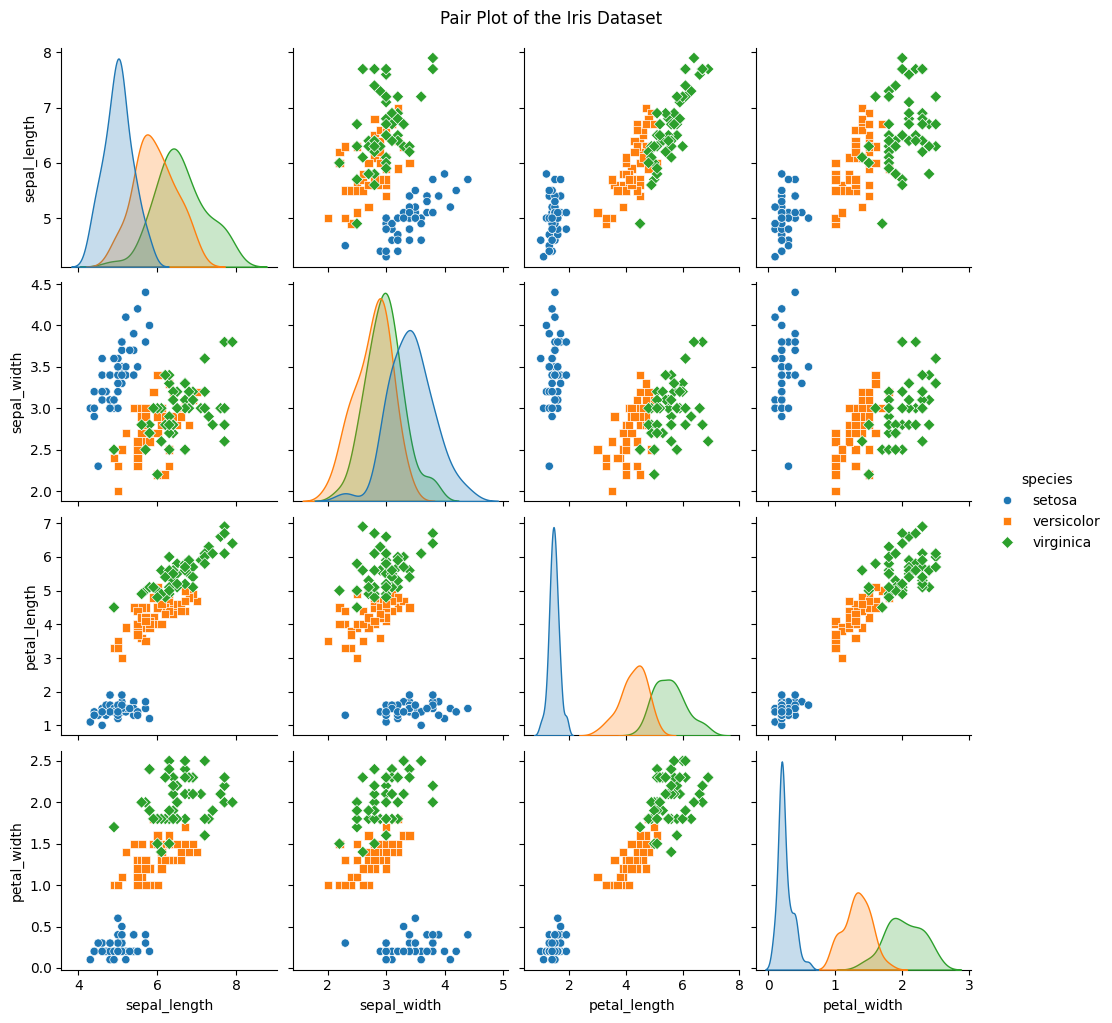

In [22]:
iris_df = sns.load_dataset('iris')

# --- 2. Create the Pair Plot ---
# This single line of code generates the entire grid of plots.
# 'hue="species"' tells Seaborn to color the data points based on the flower species,
# which allows us to see the relationships for each class.
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])

# --- 3. Display the Plot ---
plt.suptitle('Pair Plot of the Iris Dataset', y=1.02) # Add a title above the plot
plt.show()
